SAS & HSE, Applied Time Series Forecasitng , Fall 2022

<font color="blue"> HW #1 </font>

<span style="color:black; font-size: 12pt"></span>

Alexey Romanenko,
<font color="blue">alexromsput@gmail.com</font>

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Лукашин Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.
- https://otexts.com/fpp2/expsmooth.html

**Оформление дз**: 
- Присылайте выполненное задание в гугл-форму https://forms.gle/G9e9L3ue3cFhNppf7
- Выполненное дз сохраните в файл <Surname>_fall2022_hw1.ipynb, например, ivanov_fall2022_hw1.ipynb

**Вопросы**:
- Присылайте вопросы в slack в соответствующий канал

**Deadilne**: <font color="red"> 11-Dec-2022 11:59:59 pm CET </font>

В случае присланного решения позже дедлайна максимальный бал буде снижен согласно формуле

$$МаксимальныйБалл=\max\bigl(1/3,\log_2⁡(1.23 + 0.77 * max(0,(1-ДнейПослеДедлайна/14))) \bigr).$$
График зависимости максимально возможного балла за ДЗ от просрочки дедлайна приведён ниже:

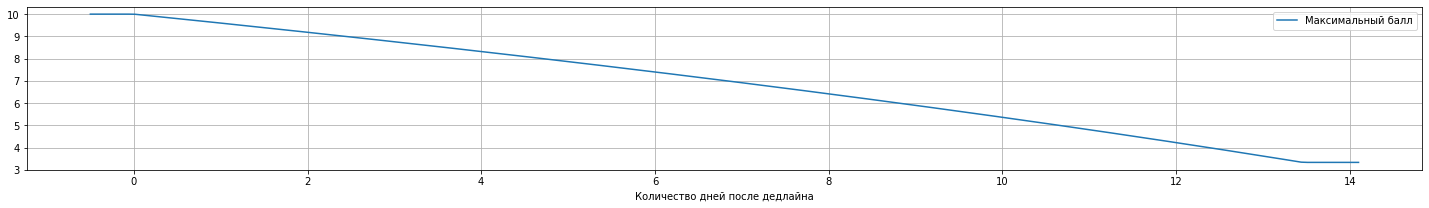

In [5]:
import pandas as pd
import numpy as np
a = 2
ax = pd.DataFrame(data = [[x, min(10, 10*max(1/3, np.log(a-0.77 + 0.77*max(0, (1-x/14)))/np.log(a)))] for x in np.linspace(-0.5,14.1,200)], columns = ['Количество дней после дедлайна', 'Максимальный балл']).set_index('Количество дней после дедлайна').plot(figsize = (25,3), grid = True)

<h1 align="center">Check Questions (5%)</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: Опишите, как изменяется адаптивная способность алгоритма Simple Exponential Smoothing при изменении параметра $\alpha$ от 0 до 1.

<Ответ>
Чем ближе $\alpha$ к 1, тем больший вес имеет последнее измерение, и тем меньше предыдущие. Поскольку каждое предыдущие измерение умножается на (1-$\alpha$) в степени равной количеству измерений между рассчитываемым и предыдущим. При $\alpha$ = 1 расчетная величина будет равна предыдущей.

**Вопрос 2**: Докажите равенство выражений в $\color{blue}{рекуррентной~форме}$ и в $\color{red} {форме~корректировки~на~ошибку}$ для модели Хольта.

$$        l_t = \color{blue}{\alpha y_t + (1-\alpha) (l_{t-1} + b_{t-1} )} = \color{red}{\hat y_{t} + \alpha e_t}$$ 

$$b_t = \color{blue}{\beta (l_{t} - l_{t-1} ) + (1-\beta) b_{t-1}} = \color{red}{b_{t-1}+ \alpha\beta e_t}.$$</td>

<Ответ>
$$        l_t = \alpha y_t + (1-\alpha) (l_{t-1} + b_{t-1} ) = l_{t-1}  + b_{t-1} + \alpha y_t - \alpha l_{t-1} - \alpha b_{t-1} =
                (l_{t-1}  + b_{t-1}) - \alpha (y_t - (l_{t-1} + b_{t-1})) = \hat y_{t} + \alpha (y_t - \hat y_{t}) = \hat y_{t} + \alpha e_t$$



$$b_t = \beta (l_{t} - l_{t-1} ) + (1-\beta) b_{t-1} = \beta (\alpha y_t + (1-\alpha) (l_{t-1} + b_{t-1} ) - l_{t-1} ) + (1-\beta) b_{t-1} =    $$

$$      = \beta  (\alpha y_t + ~~l_{t-1}~~ + b_{t-1} - \alpha l_{t-1} - \alpha b_{t-1} - ~~l_{t-1}~~ ) + (1-\beta) b_{t-1} =   $$
$$        \beta  (\alpha ( y_t - (l_{t-1} + b_{t-1} ) + b_{t-1}) + (1-\beta) b_{t-1} = \alpha \beta (y_t - \hat y_{t})
            + ~~\beta b_{t-1}~~ + b_{t-1} - ~~\beta b_{t-1}~~ = b_{t-1}+ \alpha\beta e_t.$$

**Вопрос 3**: Каким следует выбрать параметр сглаживания тренда $\beta$ в модели Хольта (линейный тренд) в случае, когда вы предсказываете временной ряд 1) с плавно меняющимя трендом; 2) стохастически меняющися трендом?

<Ответ>


<h1 align="center"> Practice</h1>

#1. reading data (5%)

Download data and prepare for following time series 
 * <span style="color:blue; font-family:'New Times Roman'; font-size:14pt"> description of the target ts you can find here  https://docs.google.com/spreadsheets/d/1HwwDZMCVUl-wpdY39TdBBKMwvks9VTe2gIpFtGBu-28/edit#gid=1251818784 </span> sheet "Анализ временных рядов" column C ("ts")



,EnergyConsumption,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Saturday,Sunday,Temp1_South_Less,Temp2_South_Less,Temp3_South_Less,Temp4_South_Less,Temp1_South_Gr,Temp2_South_Gr,Temp3_South_Gr,Temp4_South_Gr
count,1097.000000,1097.000000,0.0,0.0,0.0,0.0,0.0,0.0,1097.000000,1097.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,33483.568378,7.273564,NaN,NaN,NaN,NaN,NaN,NaN,0.137648,0.182315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4559.422031,14.342291,NaN,NaN,NaN,NaN,NaN,NaN,0.344687,0.386280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,25361.940000,-26.100000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,29690.031000,-3.900000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,32794.409000,7.900000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,37031.395000,19.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,44195.954000,32.800000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,EnergyConsumption,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Saturday,Sunday,Temp1_South_Less,Temp2_South_Less,Temp3_South_Less,Temp4_South_Less,Temp1_South_Gr,Temp2_South_Gr,Temp3_South_Gr,Temp4_South_Gr
Date,,,,,,,,,,,,,,,,,,
2010-01-01,35489.948,-0.9,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-02,35413.594,-0.1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-03,34802.671,-3.9,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,36003.836,-13.7,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,37622.963,-16.9,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,EnergyConsumption
Date,
2010-01-01,35489.948
2010-01-02,35413.594
2010-01-03,34802.671
2010-01-04,36003.836
2010-01-05,37622.963


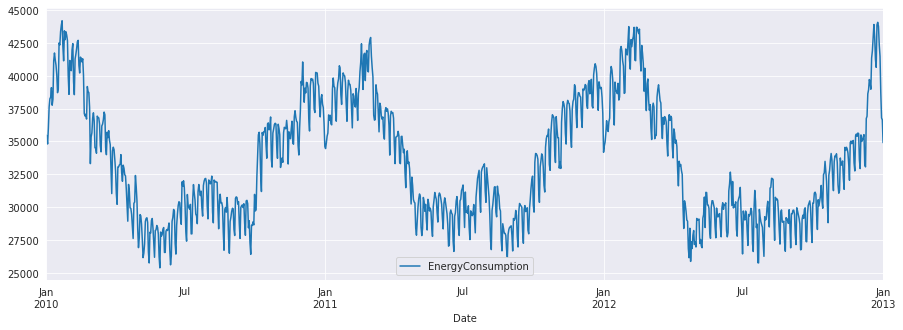

In [1]:
# start with this code
import pandas as pd
import numpy as np
from utils import InitExponentialSmoothing, build_forecast, plot_ts_forecast
from utils import qualityMAPE 

%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/aromanenko/ATSF/main/data/energy_consumption.csv', parse_dates=['Date'])
ts = df[df.id == 4].drop(columns='id').set_index('Date')['2010-01-01':'2013-01-01']
del df

display(ts.describe(include='all'))
display(ts.head())

ts.drop(['Temp2', 'Temp3', 'Temp4', 'Temp5', 'Temp6', 'Temp7', 'Temp1_South_Less', 'Temp2_South_Less', 'Temp3_South_Less', 'Temp4_South_Less',
         'Temp1_South_Gr', 'Temp2_South_Gr', 'Temp3_South_Gr', 'Temp4_South_Gr',], axis=1, inplace=True)
ts.drop(['Temp1', 'Sunday', 'Saturday'], axis=1, inplace=True)

ts.plot(figsize=(15,5))

quarter_count = int(ts.shape[0]/4)

display(ts.head())

# 2. Build the Forecast with  SES (20%)

You need to apply SES model for the ts.
You can use code from seminars or you can write down your own code using any python lib.

Forecast delay $h=1$ for all point in this task.

* 0) Forecast the ts with SES $\alpha=.1$.
* 1) Split the ts to 4 equal parts: find the best param $\alpha$ of SES for the based on 3-rd part of ts (e.g. if time series includes date from 01Jan2020 till 31Dec2021 then 3rd part will be from 1Jul2020 till 30Sep2020). Is the optimal value close to 0 or 1? (use MAPE as a loss function).
* 2) Draw the forecast that correspond to SES with optimial value $\alpha$
     Conclude whether SES can be used for this TS? If can not than explain why.
* 3) Calculate MAPE loss of the best forecast of the ts based on 4-th part of the ts.

---



## 1) Search for the optimal $\alpha$ 

In [2]:
ALPHA1 = np.arange(0.01, 0.09, 0.01)
ALPHA2 = np.arange(0.1, 1.1, 0.1)
ALPHA = np.concatenate((ALPHA1, ALPHA2), axis=None)
ESParamsArray = [{'alpha':alpha} for alpha in ALPHA]
FRC_ts = build_forecast(h=1, ts=ts, alg_name = "SimpleExponentialSmoothing", alg_title="SES",params_array = ESParamsArray, step='12MS')

In [2]:
def sort_params_by_mape(GRID_ts, _ts):
    QualityStr = pd.DataFrame(index = _ts.columns, columns = GRID_ts.keys())
    sorted(QualityStr.columns)

    ix = _ts.loc[:, 'EnergyConsumption'].index
    for param_cntr in sorted(QualityStr.columns):
        frc_ts = GRID_ts[param_cntr]
        QualityStr[param_cntr],_= qualityMAPE(_ts.loc[ix], frc_ts.loc[ix])

    _qualitySorted = QualityStr[QualityStr.columns].mean().sort_values()
    return  _qualitySorted

In [4]:
qualitySorted = sort_params_by_mape(FRC_ts, ts)
qualitySorted

SES {'alpha': 1.0}                     0.029981
SES {'alpha': 0.9}                     0.030759
SES {'alpha': 0.8}                     0.031756
SES {'alpha': 0.7000000000000001}      0.032874
SES {'alpha': 0.6}                     0.034005
SES {'alpha': 0.5}                     0.035022
SES {'alpha': 0.4}                     0.035831
SES {'alpha': 0.30000000000000004}     0.036639
SES {'alpha': 0.2}                     0.038079
SES {'alpha': 0.1}                     0.043531
SES {'alpha': 0.08}                    0.046511
SES {'alpha': 0.06999999999999999}     0.048677
SES {'alpha': 0.060000000000000005}    0.051456
SES {'alpha': 0.05}                    0.055189
SES {'alpha': 0.04}                    0.060702
SES {'alpha': 0.03}                    0.069211
SES {'alpha': 0.02}                    0.082665
SES {'alpha': 0.01}                    0.104050
dtype: float64

## 2) draw the forecast with optimial value $\alpha $

SES {'alpha': 1.0}, MAPE: 0.02998090288379149


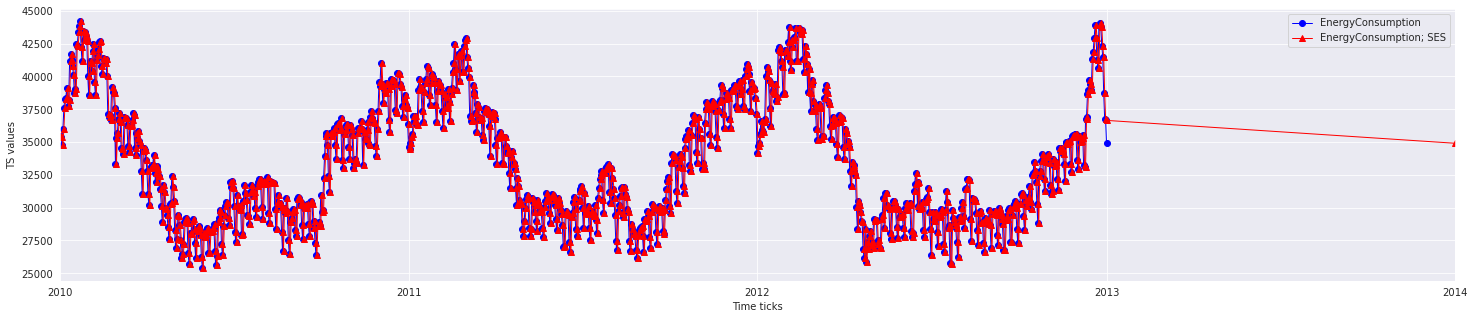

In [20]:
alg_name = qualitySorted.index[0]
plot_ts_forecast(ts, FRC_ts[alg_name], ts_num=0, alg_title='SES')
print(f'{alg_name}, MAPE: {qualitySorted[alg_name]}')

** Question**
    * Does SES follow to the TS components?


<Answer> The optimal $\alpha $ (with minimum MAPE) is 1. Therefore SES takes the previous value for prediction. SES follows TS component.
TS shows seasonal changes. SES will with $\alpha $ = 1 will always take the last known value and repeat it. SES will always show the line and will not be able to reproduce seasonal changes. So the algorithm should no be used for prediction of this TS.

## 3) Calculate loss of the forecast of TS in 4th part of the time series

In [21]:
qualityMAPE(ts.iloc[-quarter_count:]['EnergyConsumption'], FRC_ts[alg_name].iloc[-quarter_count:]['EnergyConsumption'])[0]

0.03217370003070222

# 3. Winters model for Additive Seasonality (25%)
You need to realize ES model for TS with additive seasonality and then apply it to the ts.

You can use code from seminars or you can write down your own code using any python lib.


Forecast delay $h=1$ for all point in this task.

* 1) Realize Additive Winters model
* 2) Split the ts to 4 equal parts: find the best params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) for the based on 3-rd part of ts (e.g. if time series includes date from 01Jan2020 till 31Dec2021 then 3rd part will be from 1Jul2020 till 30Sep2020). Use MAPE as a loss function.
* 3) Draw the forecast that correspond optimal values $\alpha$ and $\gamma$ for the whole TS 
* 4) Calculate MAPE loss of the best forecast of the ts based on 4-th part of the ts. Compare it with accuracy of SES: is it better? 
* 5) Based on results of 3) and 4) conclude whether Additive Winter's ES is appropriate for this TS.

## 1) Additive Winters model realization

In [3]:
import math

def WintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    gamma = Params['gamma']
    p = Params['seasonality_period']

    FORECAST = [np.NaN]*(T+h)

    l= np.NaN
    s= [np.NaN]*p

    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr]

            if math.isnan(s[cntr % p]):
                s[cntr % p]= x[cntr]

            l = alpha * (x[cntr] - s[cntr % p]) + (1 - alpha) * l
            s[cntr % p] = gamma * (x[cntr] - l) + (1 - gamma) * s[cntr % p]
        if cntr-p+h > 0 and s[(cntr-p+h)%p] is not np.NaN:
            FORECAST[cntr+h] = l + s[(cntr-p+h)%p]
    return FORECAST

## 2) Search for the optimal $\alpha$ and  $\gamma$

In [3]:
def build_forecast_wes(h, _ts, alg, params_array, step='D'):
    FRC_TS = dict()
    for p in params_array:
        hor = pd.date_range(_ts.index[-1], periods=h+1, freq=step)[1:]
        frc_ts = pd.DataFrame(index=_ts.index.append(hor), columns=_ts.columns)
        for cntr in ts.columns:
            frc_ts[cntr] = eval(alg)(_ts[cntr], h, p)
        FRC_TS[str(p)] = frc_ts
    return FRC_TS

In [5]:
params_wes = []

ALPHA1 = np.arange(0.01, 0.09, 0.01)
ALPHA2 = np.arange(0.1, 1.1, 0.1)
ALPHA = np.concatenate((ALPHA1, ALPHA2), axis=None)
GAMMA = np.concatenate((ALPHA1, ALPHA2), axis=None)
p = 7
for i in range(len(ALPHA)):
    for j in range(len(GAMMA)):
        params_wes.append({'alpha':ALPHA[i], 'gamma':GAMMA[j], 'seasonality_period':p})

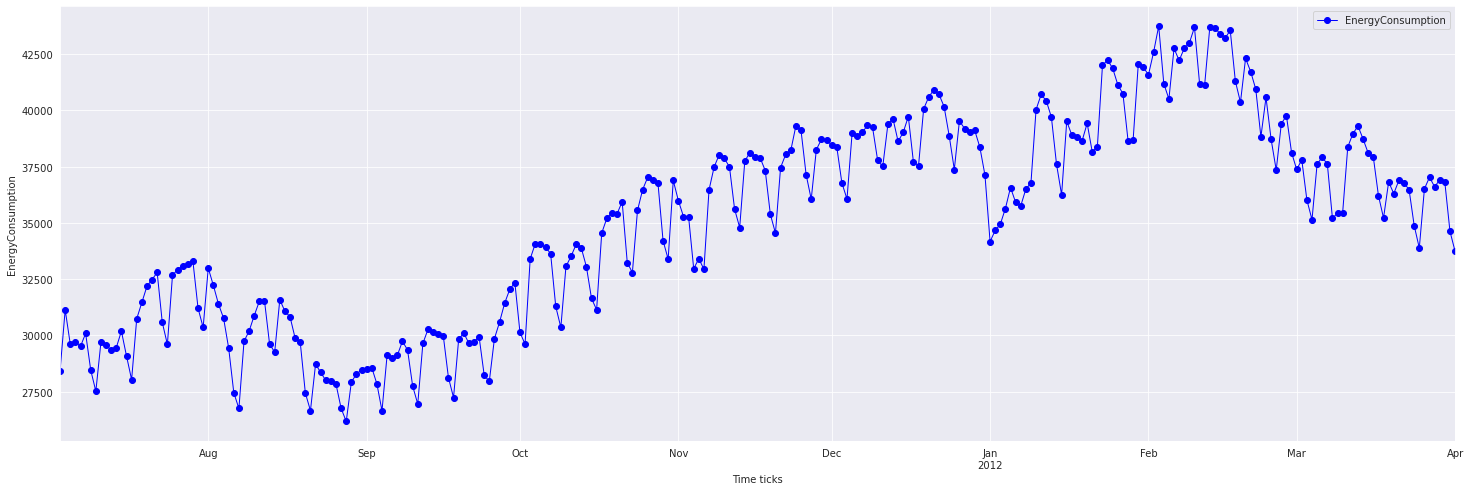

In [6]:
import matplotlib.pyplot as plt

ts.iloc[2*quarter_count:3*quarter_count]['EnergyConsumption'].plot(style='b', linewidth=1.0, marker='o', figsize = (25,8))
plt.xlabel("Time ticks")
plt.ylabel("EnergyConsumption")
plt.legend()

In [7]:
FRC_ts = build_forecast_wes(h=1, _ts=ts.iloc[2*quarter_count:3*quarter_count], alg='WintersExponentialSmoothing', params_array = params_wes)

In [10]:
qualitySorted = sort_params_by_mape(FRC_ts, ts.iloc[2*quarter_count:3*quarter_count])
qualitySorted

{'alpha': 0.8, 'gamma': 0.30000000000000004, 'seasonality_period': 7}    0.017413
{'alpha': 0.7000000000000001, 'gamma': 0.2, 'seasonality_period': 7}     0.017447
{'alpha': 0.8, 'gamma': 0.4, 'seasonality_period': 7}                    0.017529
{'alpha': 0.8, 'gamma': 0.2, 'seasonality_period': 7}                    0.017584
{'alpha': 0.9, 'gamma': 0.6, 'seasonality_period': 7}                    0.017610
                                                                           ...   
{'alpha': 0.01, 'gamma': 0.05, 'seasonality_period': 7}                  0.180097
{'alpha': 0.01, 'gamma': 0.04, 'seasonality_period': 7}                  0.188273
{'alpha': 0.01, 'gamma': 0.03, 'seasonality_period': 7}                  0.197387
{'alpha': 0.01, 'gamma': 0.02, 'seasonality_period': 7}                  0.207903
{'alpha': 0.01, 'gamma': 0.01, 'seasonality_period': 7}                  0.220386
Length: 324, dtype: float64

## 3) draw the forecast with optimial values

{'alpha': 0.8, 'gamma': 0.30000000000000004, 'seasonality_period': 7}, MAPE: 0.01741275904353192


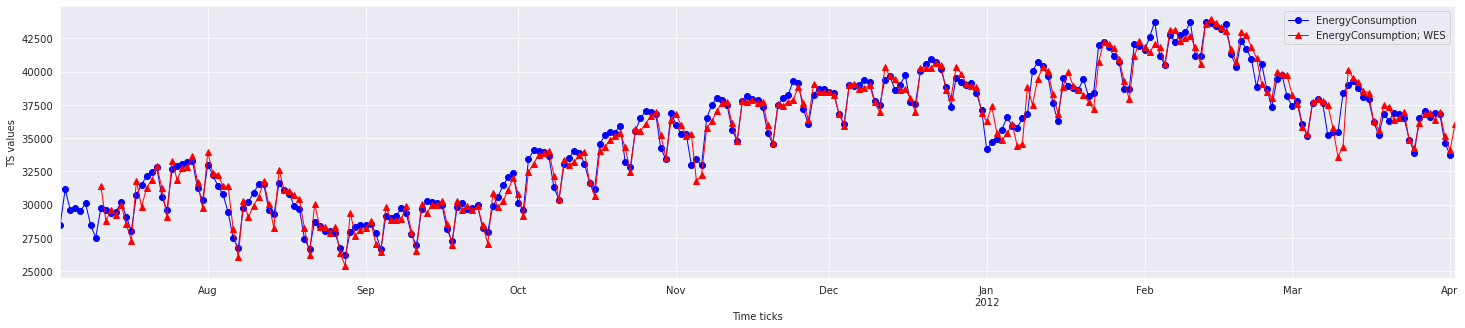

In [11]:
alg_name = qualitySorted.index[0]
plot_ts_forecast(ts.iloc[2*quarter_count:3*quarter_count], FRC_ts[alg_name], ts_num=0, alg_title='WES')
print(f'{alg_name}, MAPE: {qualitySorted[alg_name]}')

## 4) Calculate loss of the forecast of TS in 4th part of the time series

In [12]:
FRC_ts = build_forecast_wes(h=1, _ts=ts.iloc[-quarter_count:], alg='WintersExponentialSmoothing', params_array = params_wes)
qualitySorted = sort_params_by_mape(FRC_ts, ts.iloc[-quarter_count:])
alg_name = qualitySorted.index[0]
print(f'{alg_name}, MAPE: {qualitySorted[alg_name]}')

{'alpha': 0.8, 'gamma': 0.2, 'seasonality_period': 7}, MAPE: 0.021728328332927


## 5) conclusions

<Answer> Additive Winter's ES model with weekly period is appropriate for the third and forth parts of this TS. MAPE is decreased from 0.03 to 0.174 for the third part and 0.0217 for the forth part of the TS. The best selected $\alpha $ equals 0.8 and $\gamma $ equals 0.2. Which means that the forecast takes into acount some previous measurements and not only the last one. And the meaning of previous seasonal measurments is even more significant.

# 4. Theil-Wage model for TS with linear trend and seasonality (25%)
You need to realize Theil-Wage model and then use it for forecasting the ts.

You can use code from seminars or you can write down your own code using any python lib.


Forecast delay $h=1$ for all point in this task.

* 1) Realize Theil-Wage model
* 2) Split the ts to 4 equal parts: find the best params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) for the based on 3-rd part of ts (e.g. if time series includes date from 01Jan2020 till 31Dec2021 then 3rd part will be from 1Jul2020 till 30Sep2020). Use MAPE as a loss function.
* 3) Draw forecast with optimal values $\alpha$, $\beta$ and $\gamma$
* 4) Calculate MAPE loss of the best forecast of the ts based on 4-th part of the ts. Compare it with accuracy of Additive Winters model: is it better than the last one? 
* *5) Suggest how can the Theil-Wage model be improved to make accuracy of forecast better?

## 1) Theil-Wage model realization

In [13]:
import math

def TheilWageExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    gamma = Params['gamma']
    p = Params['seasonality_period']

    FORECAST = [np.NaN]*(T+h)

    l= np.NaN
    l_prev=np.NaN
    b= 0
    s= [np.NaN]*p

    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr]

            if math.isnan(s[cntr % p]):
                s[cntr % p]= x[cntr]

            l_prev = l
            l = alpha * (x[cntr] - s[cntr % p]) + (1 - alpha) * (l_prev + b)
            s[cntr % p] = gamma * (x[cntr] - l_prev - b) + (1 - gamma) * s[cntr % p]
            b = beta * (l - l_prev) + (1 - beta) * b

        if cntr-p+h > 0 and s[(cntr-p+h)%p] is not np.NaN:
            FORECAST[cntr+h] = l + h*b + s[(cntr-p+h)%p]
    return FORECAST

# params_w = ({'alpha':0.5, 'gamma':0.5, 'beta':0.5, 'seasonality_period': 365})
# TheilWageExponentialSmoothing(x=ts['EnergyConsumption'], h=1, Params=params_w)

## 2) Search for the optimal $\alpha$, $\gamma$, $\beta$

In [14]:
params_wes = []

ALPHA1 = np.arange(0.01, 0.09, 0.01)
ALPHA2 = np.arange(0.1, 1.1, 0.1)
ALPHA = np.concatenate((ALPHA1, ALPHA2), axis=None)
GAMMA = np.concatenate((ALPHA1, ALPHA2), axis=None)
BETA = np.concatenate((ALPHA1, ALPHA2), axis=None)
p = 7
for i in range(len(ALPHA)):
    for j in range(len(GAMMA)):
        for k in range(len(BETA)):
            params_wes.append({'alpha':ALPHA[i], 'gamma':GAMMA[j], 'beta': BETA[k], 'seasonality_period':p})

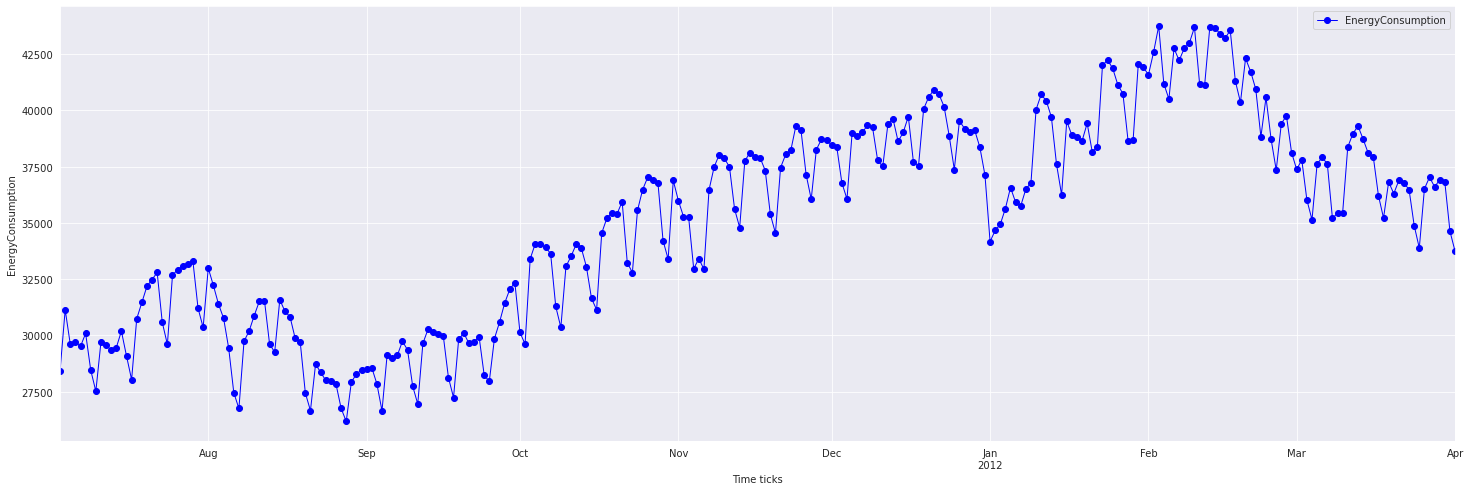

In [15]:
import matplotlib.pyplot as plt

ts.iloc[2*quarter_count:3*quarter_count]['EnergyConsumption'].plot(style='b', linewidth=1.0, marker='o', figsize = (25,8))
plt.xlabel("Time ticks")
plt.ylabel("EnergyConsumption")
plt.legend()

In [16]:
FRC_ts = build_forecast_wes(h=1, _ts=ts.iloc[2*quarter_count:3*quarter_count], alg='TheilWageExponentialSmoothing', params_array = params_wes)

In [17]:
qualitySorted = sort_params_by_mape(FRC_ts, ts.iloc[2*quarter_count:3*quarter_count])
qualitySorted

{'alpha': 0.8, 'gamma': 0.06999999999999999, 'beta': 0.01, 'seasonality_period': 7}                    1.788982e-02
{'alpha': 0.8, 'gamma': 0.060000000000000005, 'beta': 0.01, 'seasonality_period': 7}                   1.791824e-02
{'alpha': 0.8, 'gamma': 0.08, 'beta': 0.01, 'seasonality_period': 7}                                   1.792745e-02
{'alpha': 0.7000000000000001, 'gamma': 0.06999999999999999, 'beta': 0.01, 'seasonality_period': 7}     1.795137e-02
{'alpha': 0.7000000000000001, 'gamma': 0.060000000000000005, 'beta': 0.01, 'seasonality_period': 7}    1.798066e-02
                                                                                                           ...     
{'alpha': 1.0, 'gamma': 0.9, 'beta': 0.9, 'seasonality_period': 7}                                     5.366101e+09
{'alpha': 1.0, 'gamma': 1.0, 'beta': 0.8, 'seasonality_period': 7}                                     1.704368e+10
{'alpha': 1.0, 'gamma': 0.9, 'beta': 1.0, 'seasonality_period': 7}      

## 3) draw the forecast with optimial values

{'alpha': 0.8, 'gamma': 0.06999999999999999, 'beta': 0.01, 'seasonality_period': 7}, MAPE: 0.01788982437587448


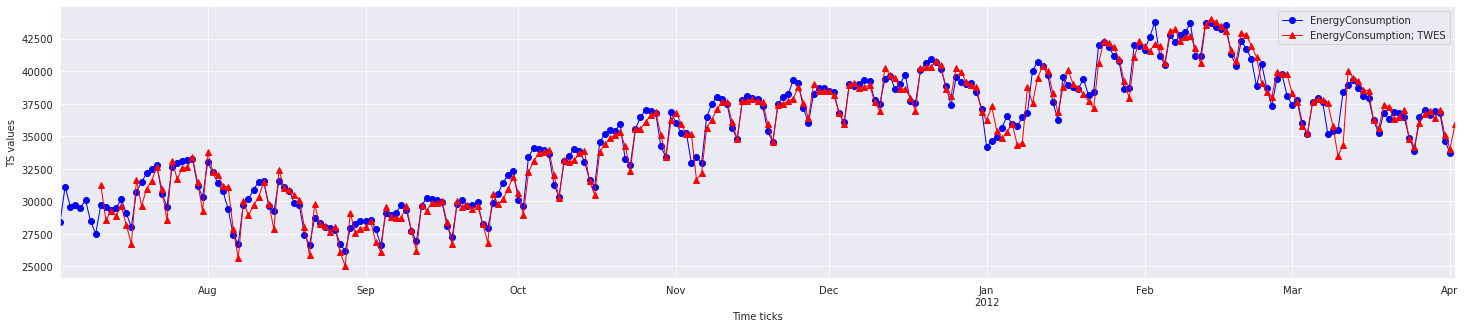

In [18]:
alg_name = qualitySorted.index[0]
plot_ts_forecast(ts.iloc[2*quarter_count:3*quarter_count], FRC_ts[alg_name], ts_num=0, alg_title='TWES')
print(f'{alg_name}, MAPE: {qualitySorted[alg_name]}')

#### It can be seen from the graph that the trend is changing direction due to a different seasonal period. Therefore, it is worth trying to cut out parts of the TS with a different trend to see if the forecast can work better.

{'alpha': 0.8, 'gamma': 0.060000000000000005, 'beta': 0.01, 'seasonality_period': 7}, MAPE: 0.01732668428409928


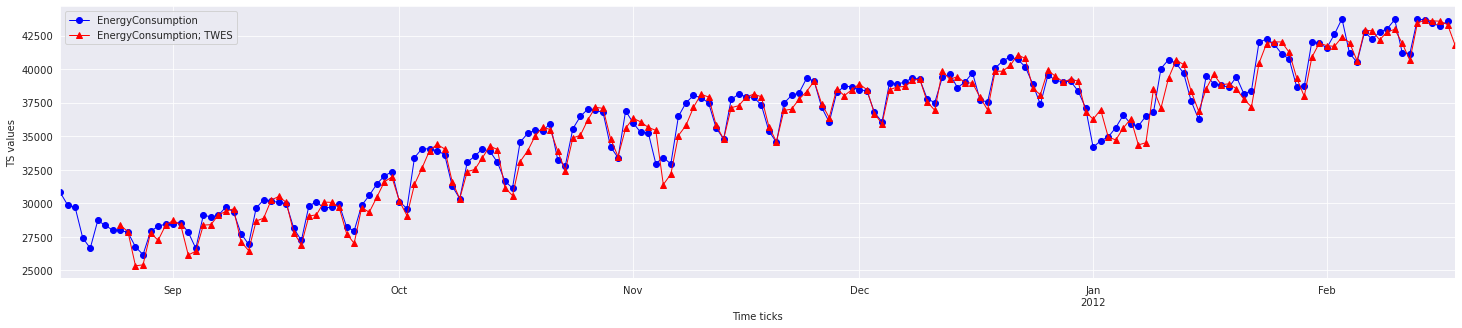

In [50]:
import datetime
ts_trend = ts.loc[datetime.date(year=2011,month=8,day=17):datetime.date(year=2012,month=2,day=17)]
FRC_ts = build_forecast_wes(h=1, _ts=ts_trend, alg='TheilWageExponentialSmoothing', params_array = params_wes)
qualitySorted = sort_params_by_mape(FRC_ts, ts_trend)
alg_name = qualitySorted.index[0]
plot_ts_forecast(ts_trend, FRC_ts[alg_name], ts_num=0, alg_title='TWES')
print(f'{alg_name}, MAPE: {qualitySorted[alg_name]}')

## 4) Calculate loss of the forecast of TS in 4th part of the time series

In [19]:
FRC_ts = build_forecast_wes(h=1, _ts=ts.iloc[-quarter_count:], alg='TheilWageExponentialSmoothing', params_array = params_wes)
qualitySorted = sort_params_by_mape(FRC_ts, ts.iloc[-quarter_count:])
alg_name = qualitySorted.index[0]
print(f'{alg_name}, MAPE: {qualitySorted[alg_name]}')

{'alpha': 0.8, 'gamma': 0.04, 'beta': 0.01, 'seasonality_period': 7}, MAPE: 0.02217379770824385


#### It looks like Theil-Wage model works worse than Winter's model: MAPE for Winter's model for the same forth part of TS is 0.0217 and MAPE for Theil-Wage model is 0.0222.
#### The trend should be checked.

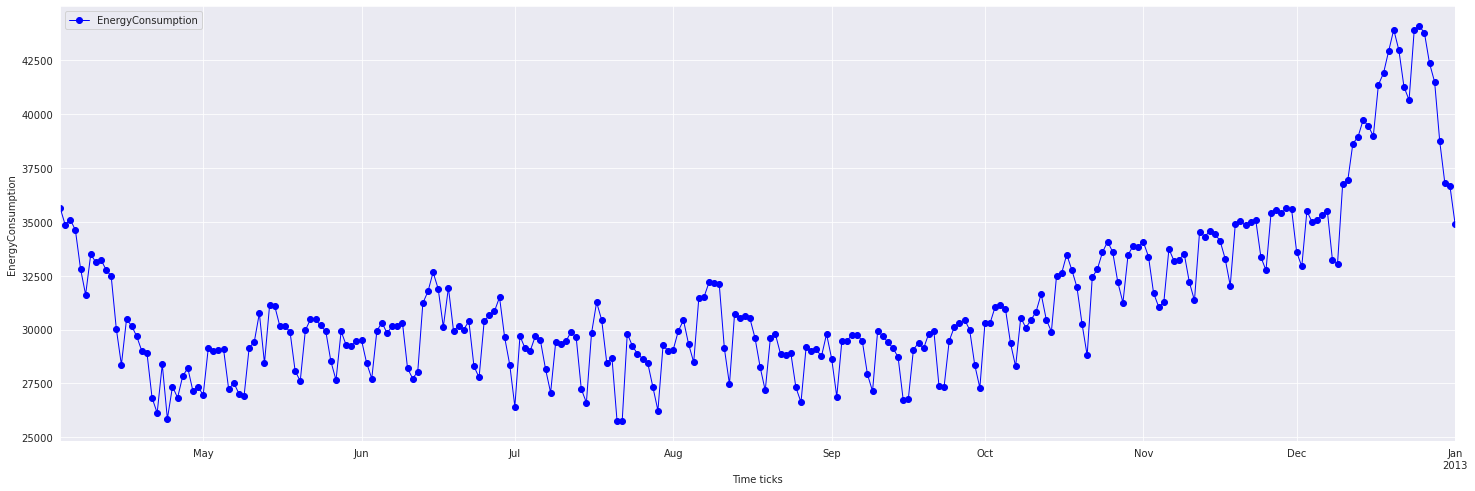

In [12]:
import matplotlib.pyplot as plt

ts.iloc[-quarter_count:]['EnergyConsumption'].plot(style='b', linewidth=1.0, marker='o', figsize = (25,8))
plt.xlabel("Time ticks")
plt.ylabel("EnergyConsumption")
plt.legend()

## 5) conclusions

<Answer> Theil-Wage model works for the third TS period, especially when parts with different trends are cut off. In this case, MAPE is reduced from 0.174 to 0.0173 for the third part, although not as much. But MAPE for the fourth part of TS increased from 0.0217 to 0.0222. As can be seen from the chart of the fourth part of the TS, there are some changes of the trend from up to down. In fact, this vehicle has two periods: a week and a year. To improve the results of the Theil-Wage model for the fourth part of TS, it can be divided into several parts with a single trend.

# 5. Non-additive model of ES (25%)
You need to realize some ES-model that include non-addive component (or multiplicative trend or multiplicative component) or/and damped-trend component and then use it for forecasting of the ts

You can use code from seminars or you can write down your own code using any python lib.

Forecast delay $h=1$ for all point in this task.

* 1) Realize one of following ES models: ESM(A,M) (t.e. Holt-Winters model), ESM(Ad,M), ESM(M,A), ESM(M,M), ESM(Md,M) model.
* 2) Split the ts to 4 equal parts: find the best params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) for the based on 3-rd part of ts (e.g. if time series includes date from 01Jan2020 till 31Dec2021 then 3rd part will be from 1Jul2020 till 30Sep2020). Use MAPE as a loss function.
Note: if you seelct damped trend model then you can set  $\phi$ value expertly (say $0.98$). (Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values of it's params. 
* 4) Calculate accuracy of the forecast of TS based on 4-th part of the ts. Compare it with accuracy of Additive Winters model and Theil-Wage model, which model is the best?
* 5) Will be results the same if forecas horizon is different (h = seasonlaity period of data)? Please give reasons for your answer.

## 1) damped trend component for Theil-Wage model realization

In [7]:
def TheilWageExponentialDampedTrendSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    gamma = Params['gamma']
    fi = Params['fi']
    p = Params['seasonality_period']

    FORECAST = [np.NaN]*(T+h)

    l= np.NaN
    l_prev=np.NaN
    b= 0
    s= [np.NaN]*p

    pol_fi = 0
    for i in range(1, h+1):
        pol_fi += pol_fi**i

    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr]

            if math.isnan(s[cntr % p]):
                s[cntr % p]= x[cntr]

            l_prev = l
            l = alpha * (x[cntr] - s[cntr % p]) + (1 - alpha) * (l_prev + fi*b)
            s[cntr % p] = gamma * (x[cntr] - l_prev - fi*b) + (1 - gamma) * s[cntr % p]
            b = beta * (l - l_prev) + (1 - beta) * fi * b

        if cntr-p+h > 0 and s[(cntr-p+h)%p] is not np.NaN:
            FORECAST[cntr+h] = l + pol_fi*b + s[(cntr-p+h)%p]
    return FORECAST

## 2) Search for the optimal $\alpha$, $\gamma$, $\beta$, $\phi$

In [5]:
params_wes_d = []

ALPHA = np.arange(0.1, 1.1, 0.1)
GAMMA = np.arange(0.01, 0.15, 0.01)
BETA = np.arange(0.01, 0.15, 0.01)
FI = np.arange(0.8, 0.98, 0.02)
p = 7
for i in range(len(ALPHA)):
    for j in range(len(GAMMA)):
        for k in range(len(BETA)):
            for l in range(len(FI)):
                params_wes_d.append({'alpha':ALPHA[i], 'gamma':GAMMA[j], 'beta': BETA[k], 'fi': FI[l], 'seasonality_period':p})

In [ ]:
import math

FRC_ts = build_forecast_wes(h=1, _ts=ts.iloc[2*quarter_count:3*quarter_count], alg='TheilWageExponentialDampedTrendSmoothing', params_array = params_wes_d)
qualitySorted = sort_params_by_mape(FRC_ts, ts.iloc[2*quarter_count:3*quarter_count])

## 3) draw the forecast with optimial values

{'alpha': 0.8, 'gamma': 0.060000000000000005, 'beta': 0.01, 'fi': 0.8, 'seasonality_period': 7}, MAPE: 0.017426735365491896


<AxesSubplot:xlabel='Time ticks', ylabel='TS values'>

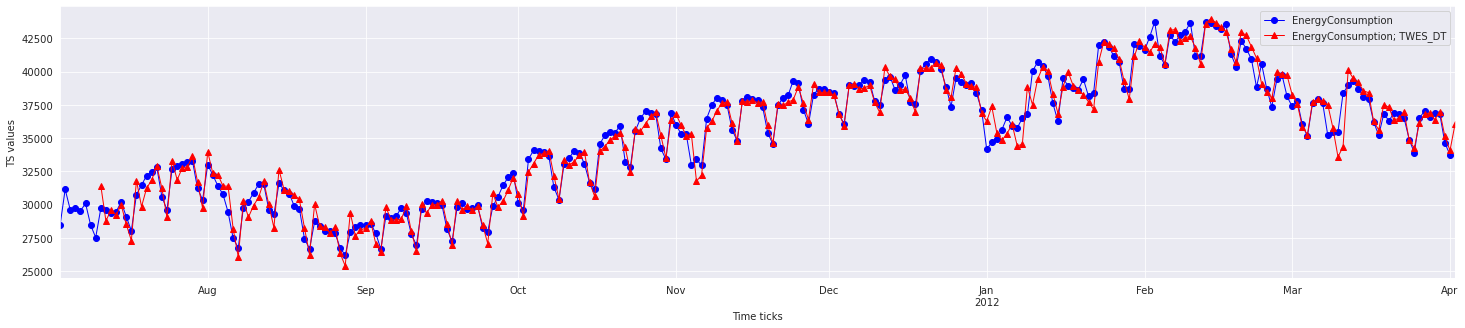

In [20]:
alg_name = qualitySorted.index[0]
print(f'{alg_name}, MAPE: {qualitySorted[alg_name]}')
plot_ts_forecast(ts.iloc[2*quarter_count:3*quarter_count], FRC_ts[alg_name], ts_num=0, alg_title='TWES_DT')

#### MAPE for the dumped Theil-Wage model is less than for simple Theil-Wage model (0.0178). It is reasonable to check this model for the period with more stable trend

{'alpha': 0.6, 'gamma': 0.060000000000000005, 'beta': 0.01, 'fi': 0.8, 'seasonality_period': 7}, MAPE: 0.016373535275538274


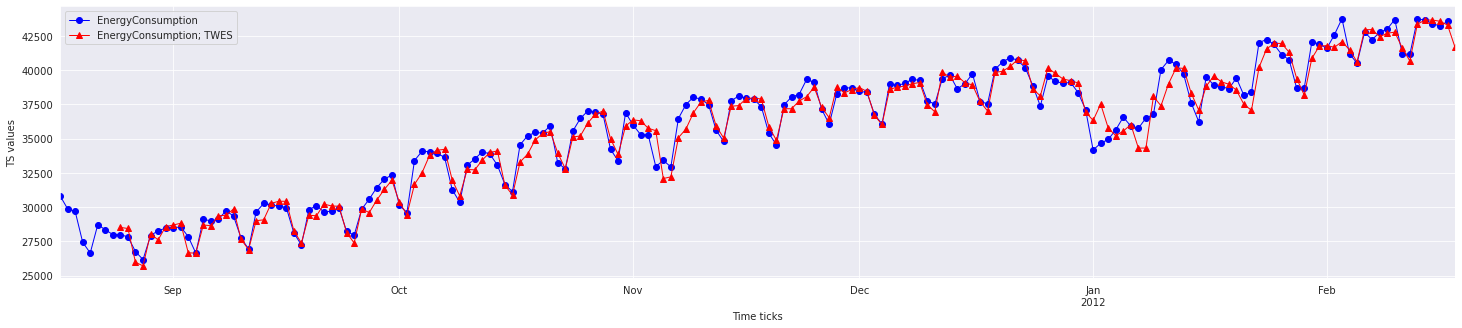

In [9]:
import datetime
import math
ts_trend = ts.loc[datetime.date(year=2011,month=8,day=17):datetime.date(year=2012,month=2,day=17)]
FRC_ts = build_forecast_wes(h=1, _ts=ts_trend, alg='TheilWageExponentialDampedTrendSmoothing', params_array = params_wes_d)
qualitySorted = sort_params_by_mape(FRC_ts, ts_trend)
alg_name = qualitySorted.index[0]
plot_ts_forecast(ts_trend, FRC_ts[alg_name], ts_num=0, alg_title='TWES_DT')
print(f'{alg_name}, MAPE: {qualitySorted[alg_name]}')

## 4) Calculate loss of the forecast of TS in 4th part of the time series

In [32]:
FRC_ts = build_forecast_wes(h=1, _ts=ts.iloc[-quarter_count:], alg='TheilWageExponentialDampedTrendSmoothing', params_array = params_wes_d)
qualitySorted = sort_params_by_mape(FRC_ts, ts.iloc[-quarter_count:])
alg_name = qualitySorted.index[0]
print(f'{alg_name}, MAPE: {qualitySorted[alg_name]}')

{'alpha': 0.8, 'gamma': 0.04, 'beta': 0.01, 'fi': 0.9600000000000002, 'seasonality_period': 7}, MAPE: 0.02176236849971333


In [10]:
FRC_ts = build_forecast_wes(h=7, _ts=ts.iloc[-quarter_count:], alg='TheilWageExponentialDampedTrendSmoothing', params_array = params_wes_d)
qualitySorted = sort_params_by_mape(FRC_ts, ts.iloc[-quarter_count:])
alg_name = qualitySorted.index[0]
print(f'{alg_name}, MAPE: {qualitySorted[alg_name]}')

{'alpha': 0.6, 'gamma': 0.06999999999999999, 'beta': 0.14, 'fi': 0.9600000000000002, 'seasonality_period': 7}, MAPE: 0.04035045195633682


<AxesSubplot:xlabel='Time ticks', ylabel='TS values'>

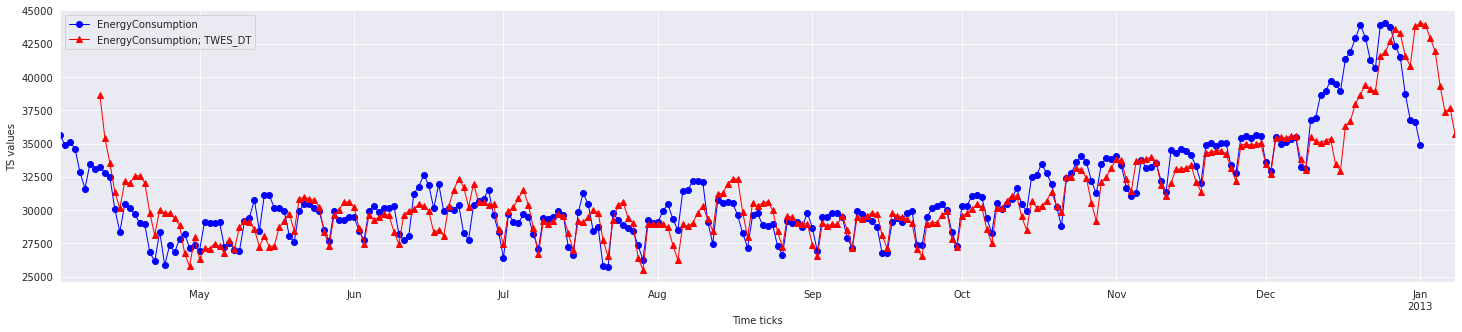

In [11]:
plot_ts_forecast(ts.iloc[-quarter_count:], FRC_ts[alg_name], ts_num=0, alg_title='TWES_DT')

## 5) conclusions

<Answer> Dumped Theil-Wage model works better than simple Theil-Wage. MAPE for third period decreased from 0.0178 to 0.0174. And improvement is much better for the third part of the TS where the trend does not change from up to down (MAPE is the lowest: 0.0164). MAPE for the forth period also decreased. But actually for both periods it is the same as the MAPE recieved from Additive Winters model.
 Regarding the the increased horizon, the forecast will worsen and start to be very late especially in those places where the trend or seasonality changes significantly.